# Stack Overflow Developer Survey Exploratory Analysis

## Introduction

Stack Overflow is a website and developer community where technical questions are shared and answered. Every year the organization distributes a survey to their users with a broad range of questions related to programming activites, career, and demographic data. The following report is an exploratory data analysis of the 2022 Stack Overflow Developer Survey results.

## Data Preparation

#### General data information:

The data used in this analysis was generated from responses to a survey distributed by Stack Overflow and collected between May 11, 2022 and June 1, 2022. The data has been made available by Stack Overflow at https://survey.stackoverflow.co/2022/.

#### Data bias and credibility:

There are some potentials sources of bias and credibility issues within this data. Being a voluntary response survey, the sampling method could introduce bias as the sample of developers who chose to respond to this survey might not be representative of the population. As well, it was not required that respondents answer every question in the survey, which could skew the analysis of certain variables.

## Data Processing

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mpl
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
#setting some formatting for plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 7]

In [3]:
#reading the csv data into pandas and creating DataFrames
comp_df = pd.read_csv('stack-overflow-developer-survey-2022/survey_results_public.csv')
df_schema = pd.read_csv('stack-overflow-developer-survey-2022/survey_results_schema.csv')

In [4]:
#getting a first look at the data within the DataFrame
comp_df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [5]:
comp_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [6]:
#creating a new DataFrame with only the variables of interest for this analysis
df = comp_df[['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 
              'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'LanguageHaveWorkedWith', 'DevType', 'OrgSize', 'Country', 'Currency', 
              'CompTotal', 'CompFreq', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility', 
              'MentalHealth', 'ConvertedCompYearly']].copy()
df.head()

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,CompTotal,CompFreq,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ConvertedCompYearly
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,32000.0,Yearly,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",40205.0
3,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,60000.0,Monthly,35-44 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,215232.0
4,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(73268, 24)

After narrowing the DataFrame to include only data of interest, a closer look can be taken at those individual variables.

### Gender

In [8]:
df['Gender'].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

There are a lot of custom answers given for gender, but it would help to have cleaner categories for analysis. Most of the custom answers are variations that represent non-binary respondents, so those responses will be grouped into the existing 'Non-binary, genderqueer, or gender non-conforming' category.

In [9]:
#creating a dicitonary of replacement values to remap gender responses
genderDict = {
    'Man' : 'Man',
    'Woman' : 'Woman',
    'Prefer not to say': 'Prefer not to say',
    'Or, in your own words:' : 'Prefer not to say',
    'Non-binary, genderqueer, or gender non-conforming' : 'Non-binary, genderqueer, or gender non-conforming',
    'Man;Non-binary, genderqueer, or gender non-conforming': 'Non-binary, genderqueer, or gender non-conforming',
    'Man;Or, in your own words:' : 'Non-binary, genderqueer, or gender non-conforming',
    'Woman;Non-binary, genderqueer, or gender non-conforming': 'Non-binary, genderqueer, or gender non-conforming',
    'Man;Woman;Non-binary, genderqueer, or gender non-conforming' : 'Non-binary, genderqueer, or gender non-conforming',
    'Man;Woman' : 'Non-binary, genderqueer, or gender non-conforming',
    'Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming' : 'Non-binary, genderqueer, or gender non-conforming',
    'Or, in your own words:;Non-binary, genderqueer, or gender non-conforming' : 'Non-binary, genderqueer, or gender non-conforming',
    'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming' : 'Non-binary, genderqueer, or gender non-conforming',
    'Or, in your own words:;Woman' : 'Woman',
    'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming' : 'Non-binary, genderqueer, or gender non-conforming',
    'Man;Or, in your own words:;Woman' : 'Non-binary, genderqueer, or gender non-conforming'
}

df.replace({'Gender': genderDict}, inplace=True)

In [10]:
df['Gender'].value_counts()

Man                                                  64607
Woman                                                 3412
Prefer not to say                                     1451
Non-binary, genderqueer, or gender non-conforming     1383
Name: Gender, dtype: int64

In [11]:
#saving value count results to use in plot
genderCounts = df['Gender'].value_counts()
genderCountsDF = pd.DataFrame({'Gender': genderCounts.index, 'Count': genderCounts.values, 
                               'Percentage': (genderCounts.values/genderCounts.sum()*100)})
genderCountsDF

,Gender,Count,Percentage
0,Man,64607,91.184565
1,Woman,3412,4.815604
2,Prefer not to say,1451,2.047902
3,"Non-binary, genderqueer, or gender non-conforming",1383,1.951929


([<matplotlib.axis.YTick at 0x7fe6f95e8650>,
 <a list of 4 Text yticklabel objects>)

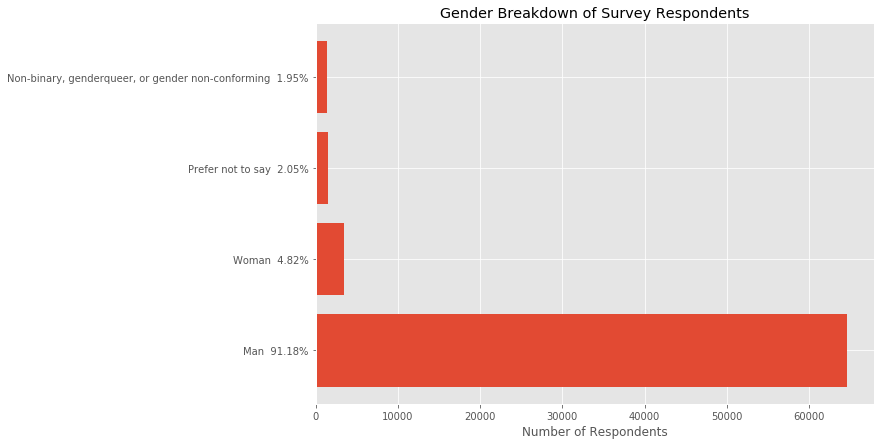

In [12]:
#horizontal bar graph for gender breakdown
plt.barh(genderCountsDF.Gender, genderCountsDF.Count)
plt.title('Gender Breakdown of Survey Respondents')
plt.xlabel('Number of Respondents')

#adding percentages to each of the group labels
newLabels = [i+'  {:.2f}%'.format(j) for i, j in zip(genderCountsDF.Gender, genderCountsDF.Percentage)]
plt.yticks(range(len(genderCountsDF.Gender)), newLabels)

It is clear that the vast majority of survey respondents were male, comprising 91.18% of the sample. Respondents fall into a broad range of careers and industries so it is difficult to get a strict comparison, but these differences seem to be more exaggerated compared with some published estimates for computing careers. According to techopedia, "women only hold 25% of professional computing occupations in the U.S. and 28% of STEM jobs" (https://www.techopedia.com/the-gender-gap-in-tech-2022/2/34746).

### Mental Health

In [13]:
df['MentalHealth'].value_counts().tail()

Or, in your own words:;I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have learning differences (e.g., Dyslexic, Dyslexia, etc.);I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)    2
I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder;Or, in your own words:;I have learning differences (e.g., Dyslexic, Dyslexia, etc.)                               1
I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);Or, in your own words:;I have learning differences (e.g., Dyslexic, Dyslexia, etc.)                                                          1
I have an anxiety disorder;Or, in your own words:;I have learning differences (e.g., Dyslexic, Dyslexia, etc.)                                                                                                              1
Or, in your own words:;I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have learning differen

Taking a look at the mental health data, it is apparent that multiple factors are being conveyed within the responses to this one question. First of all whether respondents are living with mental health conditions, as well as the number and types of mental health conditions.

In order to better analyze this mental health data, rows where this question was left unaswered will be dropped. The responses also need to be processed in order to efficiently count the number of mental health condiitons each respondent listed. Looking at the unique responses to this question, we can see that respondents could choose from a list of conditions or input a custom reponse. For the generic responses, each selection is separated by a semicolon. However, when a custom response is selected, there is an extra semicolon added ('Or, in your own words:;'), so this needs to be addressed.

In [14]:
df.dropna(subset=['MentalHealth'], inplace=True)
df.loc[:, 'MentalHealth'] = df.loc[:, 'MentalHealth'].str.replace(':;', ',') 

In [15]:
#counting function to determine number of mental health conditions reported by each respondent
def countFunc(x):
    if (x == 'None of the above'):
        num = 0
        return num
    elif (x == 'Prefer not to say'):
        num = -1
        return num
    else:
        sems = x.count(';')
        num = sems + 1
        return num

#creating a new column for number of mental health conditions by applying the function above    
df['MentalHealthCount'] = df['MentalHealth'].apply(countFunc)
df['MentalHealthCount'].value_counts()


 0    46849
 1     9766
 2     4053
-1     3435
 3     1705
 4      512
 5      127
Name: MentalHealthCount, dtype: int64

In [16]:
#creating a new column in our DataFrame for MentalHealthCategory (was a mental health condition reported?)
def mHCategory(x):
    if (x == 0):
        cat = 'No'
        return cat
    elif (x == -1):
        cat = 'Undisclosed'
        return cat
    else:
        cat = 'Yes' 
        return cat
    
df['MentalHealthCategory'] = df['MentalHealthCount'].apply(mHCategory)
df['MentalHealthCategory'].head(10)

2     Yes
3      No
5     Yes
6      No
7      No
8     Yes
9      No
10     No
11    Yes
12     No
Name: MentalHealthCategory, dtype: object

In [17]:
#saving value count results for mental health category to use in plot
mHCatCounts = df['MentalHealthCategory'].value_counts()
mHCatCountsDF = pd.DataFrame({'Mental Illness': mHCatCounts.index, 'Count': mHCatCounts.values})
mHCatCountsDF

,Mental Illness,Count
0,No,46849
1,Yes,16163
2,Undisclosed,3435


Text(0.5, 1.0, 'Mental Health Category (Was a Mental Health Condition Reported?)')

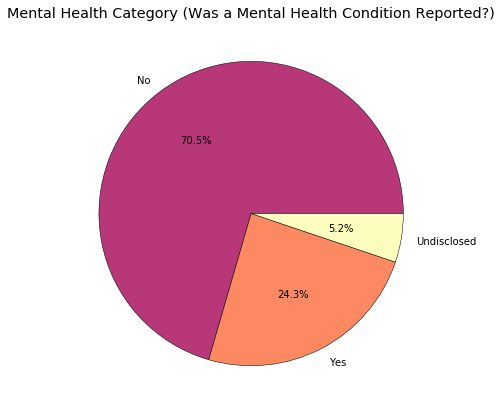

In [18]:
#pie chart for mental health category
mHpieColors = ['#b73779', '#fc8961', '#fcfdbf']
plt.pie(mHCatCountsDF.Count, labels=mHCatCountsDF['Mental Illness'], colors=mHpieColors, autopct='%1.1f%%', 
        wedgeprops={'edgecolor': 'black'})
plt.title('Mental Health Category (Was a Mental Health Condition Reported?)')

The majority of respondents did not report living with any mental health conditions. According to Johns Hopkins, "An estimated 26% of Americans ages 18 and older -- about 1 in 4 adults -- suffers from a diagnosable mental disorder in a given year" (https://www.hopkinsmedicine.org/health/wellness-and-prevention/mental-health-disorder-statistics). Even though the Stack Overflow survey data is globally sourced, the majority of repondents did come from the United States so the Johns Hopkins estimates can provide some rough context with which to view this data. With that, is seems as though the Stack Overflow community is roughly in line with U.S. national trends in terms of mental health status.

Next, the number and types of mental health conditions will be considered in order to develop a deeper understanding on the mental health of survey respondents. 

In [19]:
#saving value count results for number of mental health conditions to use in plot
mHCounts = df['MentalHealthCount'].value_counts()
mHCountsDF = pd.DataFrame({'Number': mHCounts.index, 'Count': mHCounts.values,
                          'Percentage': (mHCounts.values/mHCounts.sum()*100)})
mHCountsDF

,Number,Count,Percentage
0,0,46849,70.505817
1,1,9766,14.697428
2,2,4053,6.099598
3,-1,3435,5.169534
4,3,1705,2.565955
5,4,512,0.770539
6,5,127,0.191130


Text(0, 0.5, 'Number of Mental Health Conditions')

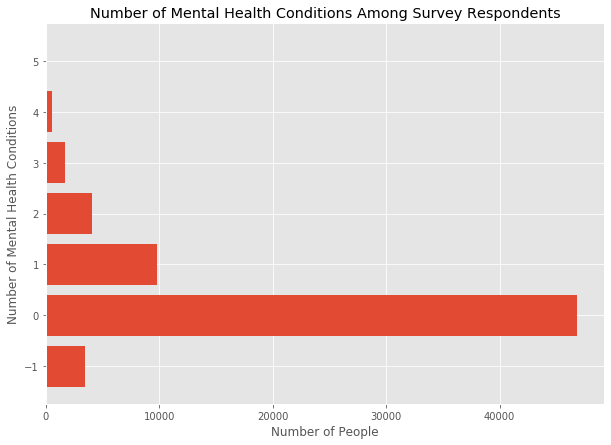

In [20]:
#horizontal bar graph for number of mental health conditions reported
plt.barh(mHCountsDF.Number, mHCountsDF.Count)
plt.title('Number of Mental Health Conditions Among Survey Respondents')
plt.xlabel('Number of People')
plt.ylabel('Number of Mental Health Conditions')

Again, the data shows that the majority of respondents did not report living with any mental health conditions. For those that do have mental health conditions, the majority reported only one condition.

In [21]:
#counting number reported for each type of mental health condition
mHCounter = Counter()

mHResponses = df['MentalHealth']
for response in mHResponses:
    mHCounter.update(response.split(';'))
    
mHCounter

Counter({'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)': 6449,
         'I have an anxiety disorder': 6848,
         'None of the above': 46849,
         'Or, in your own words:': 673,
         'I have a concentration and/or memory disorder (e.g., ADHD, etc.)': 6916,
         'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)': 1829,
         "I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)": 2813,
         'Prefer not to say': 3435,
         'Or, in your own words,I have a concentration and/or memory disorder (e.g., ADHD, etc.)': 110,
         "Or, in your own words,I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)": 21,
         'Or, in your own words,I have learning differences (e.g., Dyslexic, Dyslexia, etc.)': 11})

In [22]:
disorderDict = dict(mHCounter)
disorderItems = disorderDict.items()
disorderData = list(disorderItems)
disorderData

[('I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)',
  6449),
 ('I have an anxiety disorder', 6848),
 ('None of the above', 46849),
 ('Or, in your own words:', 673),
 ('I have a concentration and/or memory disorder (e.g., ADHD, etc.)', 6916),
 ('I have learning differences (e.g., Dyslexic, Dyslexia, etc.)', 1829),
 ("I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)", 2813),
 ('Prefer not to say', 3435),
 ('Or, in your own words,I have a concentration and/or memory disorder (e.g., ADHD, etc.)',
  110),
 ("Or, in your own words,I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",
  21),
 ('Or, in your own words,I have learning differences (e.g., Dyslexic, Dyslexia, etc.)',
  11)]

In [23]:
#categorizing types of mental health conditions with frequency
disorderCountType = {
    'Concentration and/or Memory': 0,
    'Anxiety': 0,
    'Mood or Emotional': 0,
    'Autism Spectrum': 0,
    'Learning Differences': 0
}

for item in disorderData:
    if 'mood' in item[0]:
        disorderCountType['Mood or Emotional'] += item[1]
    elif 'anxiety' in item[0]:
        disorderCountType['Anxiety'] += item[1]
    elif 'concentration' in item[0]:
        disorderCountType['Concentration and/or Memory'] += item[1]
    elif 'learning' in item[0]:
        disorderCountType['Learning Differences'] += item[1]
    elif 'autism' in item[0]:
        disorderCountType['Autism Spectrum'] += item[1]

disorderCountType

{'Concentration and/or Memory': 7026,
 'Anxiety': 6848,
 'Mood or Emotional': 6449,
 'Autism Spectrum': 2834,
 'Learning Differences': 1840}

Text(0.5, 0, 'Number Reported')

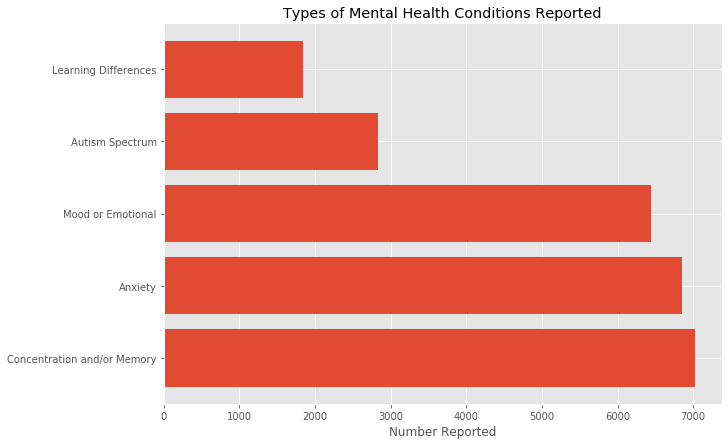

In [24]:
#bar chart for disorder types
disorderTypes = list(disorderCountType.keys())
disorderVals = list(disorderCountType.values())

plt.barh(range(len(disorderCountType)), disorderVals, tick_label=disorderTypes)
plt.title('Types of Mental Health Conditions Reported')
plt.xlabel('Number Reported')

Concentration and memory disorders were the most common mental health conditions, followed closely by anxiety disorders.

### Learning to Code

In [25]:
df['LearnCode'].head()

2    Books / Physical media;Friend or family member...
3    Books / Physical media;School (i.e., Universit...
5    Books / Physical media;School (i.e., Universit...
6    Other online resources (e.g., videos, blogs, f...
7                      Online Courses or Certification
Name: LearnCode, dtype: object

In [26]:
df['LearnCode'].isna().sum()

65

In [27]:
#counting the frequency with which each learning method was reported
df.dropna(subset=['LearnCode'], inplace=True)
lCCounter = Counter()

lCResponses = df['LearnCode']
for response in lCResponses:
    lCCounter.update(response.split(';'))
    
lCCounter

Counter({'Books / Physical media': 36309,
         'Friend or family member': 9251,
         'Other online resources (e.g., videos, blogs, forum)': 47268,
         'School (i.e., University, College, etc)': 41523,
         'Online Courses or Certification': 31065,
         'On the job training': 26654,
         'Coding Bootcamp': 7137,
         'Colleague': 12270,
         'Other (please specify):': 3281,
         'Hackathons (virtual or in-person)': 4939})

In [28]:
#getting the data into a usable format for a plot
learnMethodDict = dict(lCCounter)
learnMethodItems = learnMethodDict.items()
learnMethodData = list(learnMethodItems)
learnMethodData

learnMethod = []
learnMethodCount = []

for item in learnMethodData:
    learnMethod.append(item[0])
    learnMethodCount.append(item[1])

learnMethod

['Books / Physical media',
 'Friend or family member',
 'Other online resources (e.g., videos, blogs, forum)',
 'School (i.e., University, College, etc)',
 'Online Courses or Certification',
 'On the job training',
 'Coding Bootcamp',
 'Colleague',
 'Other (please specify):',
 'Hackathons (virtual or in-person)']

Text(0.5, 0, 'Number of Responses')

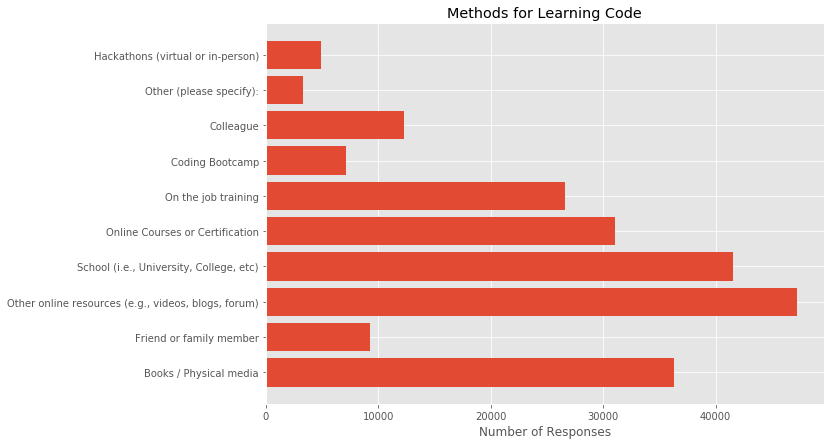

In [29]:
#plot of most popular learning methods
plt.barh(learnMethod, learnMethodCount)
plt.title('Methods for Learning Code')
plt.xlabel('Number of Responses')

Online resources seem to be the most common way through which survey respondents learn to code, with traditional schooling coming in second. With the rise of coding bootcamps in the past several years, it was surprising to see that they ranked relatively low in terms of numbers as a method for learning code.

### Remote Work

In [30]:
df['RemoteWork'].value_counts()

Fully remote                            23695
Hybrid (some remote, some in-person)    23268
Full in-person                           7845
Name: RemoteWork, dtype: int64

In [31]:
#saving the value counts results to use in plot
remoteCounts = df['RemoteWork'].value_counts()
remoteCountsDF = pd.DataFrame({'Work Style': remoteCounts.index, 'Count': remoteCounts.values})
remoteCountsDF

,Work Style,Count
0,Fully remote,23695
1,"Hybrid (some remote, some in-person)",23268
2,Full in-person,7845


Text(0.5, 1.0, 'Work Style of Survey Respondents')

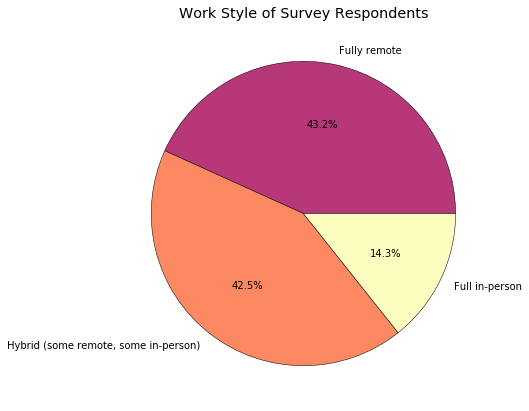

In [32]:
#pie chart for work style
wSpieColors = ['#b73779', '#fc8961', '#fcfdbf']
plt.pie(remoteCountsDF.Count, labels=remoteCountsDF['Work Style'], colors=wSpieColors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Work Style of Survey Respondents')

### Years Coding

In [33]:
df['YearsCode'].unique()

array(['14', '20', '15', '3', '1', '6', '37', '5', '12', '22', '11', '7',
       '13', '36', '25', '10', '16', '4', '27', '24', '8', '19', '2',
       '40', '9', '17', '18', '26', 'More than 50 years', '29', '30',
       '32', 'Less than 1 year', nan, '48', '45', '38', '39', '28', '23',
       '43', '21', '41', '35', '50', '33', '31', '34', '44', '42', '46',
       '47', '49'], dtype=object)

In [34]:
df['YearsCodePro'].unique()

array(['5', '17', nan, '6', '30', '2', '10', '15', '4', '22', '20', '9',
       '14', '21', '7', '18', '3', '25', '8', '12', '45', '1', '19', '28',
       '24', '11', '23', 'Less than 1 year', '40', '32', '27', '16', '44',
       '26', '37', '46', '13', '31', '39', '34', '38', '35', '29', '42',
       '36', '33', '43', '41', '48', '50', 'More than 50 years', '47',
       '49'], dtype=object)

In [35]:
df['YearsCode'].dtype

dtype('O')

For the 'YearsCode' data (as well as 'YearsCodePro'), they are contained as a python objects. Looking at the unique values, it appears as though the edge cases are non-numeric. For further analysis, these two series will be converted into numeric data, replacing the non-numeric values with nan. This conversion may slightly skew the data, but it will allow for better analysis and is acceptable for the purposes of this project.

In [36]:
#converting the two series to numeric data types
df['YearsCode'] = pd.to_numeric(df.YearsCode, errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df.YearsCodePro, errors='coerce')

In [37]:
df['YearsCode'].dtype

dtype('float64')

In [38]:
df.describe()

,YearsCode,YearsCodePro,CompTotal,ConvertedCompYearly,MentalHealthCount
count,64714.000000,46453.000000,3.671900e+04,3.639000e+04,66382.000000
mean,12.477779,10.281640,2.451074e+52,1.721908e+05,0.334503
std,9.733655,8.568075,4.696746e+54,7.928271e+05,0.855644
min,1.000000,1.000000,0.000000e+00,1.000000e+00,-1.000000
25%,5.000000,4.000000,3.000000e+04,3.600000e+04,0.000000
50%,10.000000,8.000000,7.800000e+04,6.844700e+04,0.000000
75%,17.000000,15.000000,1.540000e+05,1.200000e+05,0.000000
max,50.000000,50.000000,9.000000e+56,5.000000e+07,5.000000


### Compensation

In [39]:
df['ConvertedCompYearly'].isna().sum()

29992

A large number of respondents did not report their compensation on the survey. This can definitely skew analysis when relating compensation to other variables, and thus needs to be addressed. Rather than deleting all data for which the compensation value is missing, a new DataFrame will be created in which each repondent has included salary data.

In [40]:
salaryDF = df.dropna(axis='index', how='any', subset=['ConvertedCompYearly']).copy()

In [41]:
salaryDF['ConvertedCompYearly'].isna().sum()

0

Even though Stack Overflow has created the 'ConvertedCompYearly' to account for different currencies and pay schedules among respondents, geographic location has a huge impact on compensation. For that reason, in certain cases it might be useful to look specifically at respondents within one country when analyzing compensation in conjunction with other variables. For this dataset the United States represented the largest number of survey respondents and thus will be used for salary analysis in this project.

In [42]:
#creating a DataFrame for respondents from the United States
countryGroups = salaryDF.groupby(['Country'])
usDF = countryGroups.get_group('United States of America').copy()

## Exploring Potential Relationships Among Variables

The first relationship being explored is between mental health and compensation. In order to diminish potentially confounding variables that may affect compensation level, this analysis will be done using only respondents from the U.S. 

In [43]:
#getting median salary for MentalHealthCategory groups
yesMHMedianSalary = usDF.loc[usDF['MentalHealthCategory'] == 'Yes', 'ConvertedCompYearly'].median()
noMHMedianSalary = usDF.loc[usDF['MentalHealthCategory'] == 'No', 'ConvertedCompYearly'].median()
overallMedianSalary = usDF['ConvertedCompYearly'].median()

([<matplotlib.axis.YTick at 0x7fe6feef8a10>,
 <a list of 3 Text yticklabel objects>)

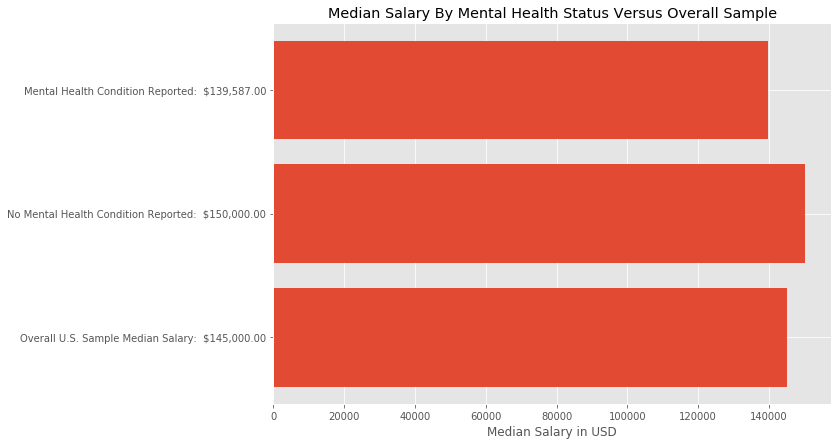

In [44]:
#plot for median salary by mental health category
medians = [overallMedianSalary, noMHMedianSalary, yesMHMedianSalary]
groups = ['Overall U.S. Sample Median Salary', 'No Mental Health Condition Reported', 'Mental Health Condition Reported']
plt.barh(groups, medians)
plt.title('Median Salary By Mental Health Status Versus Overall Sample')
plt.xlabel('Median Salary in USD')

salByMHCatLabels = [i+':  ${:0,.2f}'.format(j) for i, j in zip(groups, medians)]
plt.yticks(range(len(groups)), salByMHCatLabels)

Respondents who reported no mental health conditions had a higher median salary than those who did report mental health conditions. This makes sense seeing as a requirement for diagnosis of a mental health condition requires that it interfere with daily life in some capacity. To look further into this trend, median salary will be analyzed again, this time by number of mental health conditions reported.

In [45]:
#grouping data by 'MentalHealthCount' and getting median salaries for thos grouups
mHCountGroups = usDF.groupby(['MentalHealthCount'])
salByMHCountGroup = mHCountGroups['ConvertedCompYearly'].median()


salbyMHC_df = pd.DataFrame({'MentalHealthNumber': salByMHCountGroup.index, 'MedianSalary': salByMHCountGroup.values})
salbyMHC_df

,MentalHealthNumber,MedianSalary
0,-1,140000.0
1,0,150000.0
2,1,140000.0
3,2,134000.0
4,3,132000.0
5,4,140000.0
6,5,112500.0


Text(0, 0.5, 'Median Salary USD')

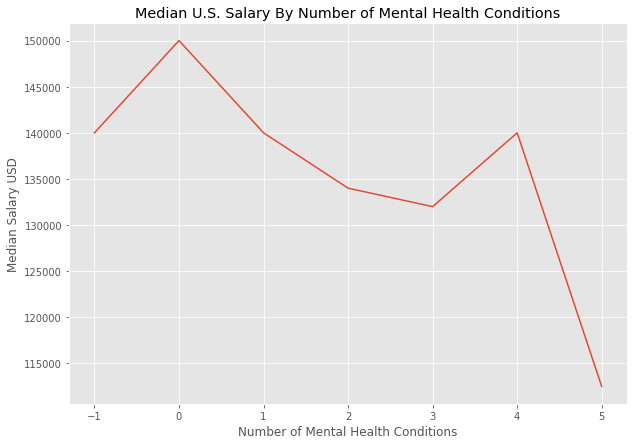

In [46]:
#plot for median salary by number of mental health conditions
plt.plot(salbyMHC_df['MentalHealthNumber'], salbyMHC_df['MedianSalary'])
plt.title('Median U.S. Salary By Number of Mental Health Conditions')
plt.xlabel('Number of Mental Health Conditions')
plt.ylabel('Median Salary USD')

In [47]:
usDF['MentalHealthCount'].value_counts()

 0    4950
 1    1728
 2     846
 3     415
-1     335
 4     110
 5      18
Name: MentalHealthCount, dtype: int64

The graph shows a spike in median salary for the group of U.S. residents who reported four mental health conditions rising to the same level as those who reported only one mental health condition. This is interesting because apart from that group, there seems to be an inverse relationship between median salary and number of mental health conditions reported. It is important to keep in mind when looking at these relationship though, the differences in sample size between the groups.

Now age and years of coding are going to be included while continuing to explore possible relationships to salary.

In [48]:
#assigning the 'prefer not to say' response for age to nan and subsequently dropping nans
usDF['Age'].replace('Prefer not to say', np.nan, inplace=True)
salaryAgeDF = usDF.dropna(axis='index', how='any', subset=['Age']).copy()

In [49]:
salaryAgeDF['Age'].unique()

array(['35-44 years old', '25-34 years old', '55-64 years old',
       '45-54 years old', '18-24 years old', '65 years or older',
       'Under 18 years old'], dtype=object)

In [50]:
#making a dictionary to assign colors to age groups for the next plot
ageColor = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6 
}

Text(0.5, 1.0, 'Salary (USD) By Years of Professional Coding')

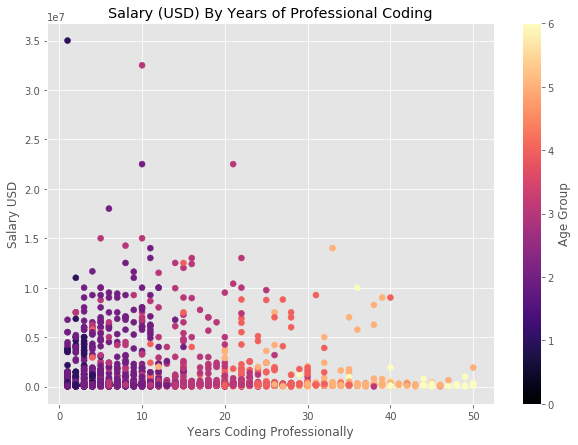

In [51]:
#scatterplot median salary vs. yearscodepro
ageColorMapping = salaryAgeDF['Age'].map(ageColor)

plt.scatter(salaryAgeDF['YearsCodePro'], salaryAgeDF['ConvertedCompYearly'], c=ageColorMapping, cmap='magma')
plt.xlabel('Years Coding Professionally')
plt.ylabel('Salary USD')
cbar = plt.colorbar(ticks=[0,1,2,3,4,5,6]) 
cbar.set_label('Age Group')
plt.title('Salary (USD) By Years of Professional Coding')

First of all, this plot highlights a few outliers present within the data for reported salary. Knowing if and where outliers exist in a dataset is valuable informaiton and needs to be considered when conducting analysis as it can skew some descriptive statistics. Looking at the overall graph, there does appear to be a relationship between age and years of coding professionally which is expected, but there is not a clear relationship between salary and years of professional coding.

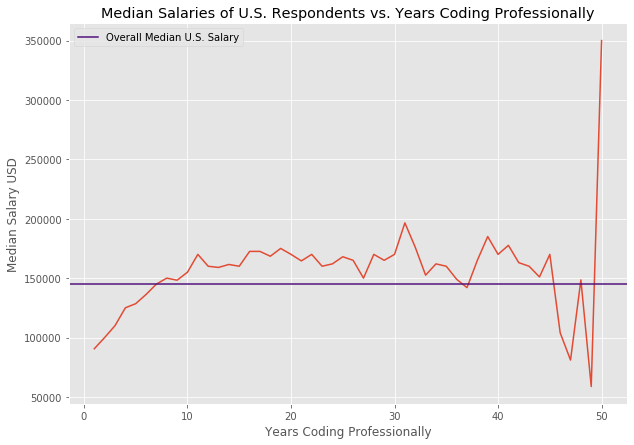

In [52]:
#US median salary by yearscodepro
usDF.sort_values(by='YearsCodePro')
usYearsCodeProGroups = usDF.groupby(['YearsCodePro'])
usOverallMedianSal = usDF['ConvertedCompYearly'].median()
medianByYear = dict(usYearsCodeProGroups['ConvertedCompYearly'].median())
years = list(medianByYear.keys())
medians = list(medianByYear.values())
plt.plot(years, medians)
plt.title('Median Salaries of U.S. Respondents vs. Years Coding Professionally')
plt.xlabel('Years Coding Professionally')
plt.ylabel('Median Salary USD')
plt.axhline(usOverallMedianSal, color='#51127c', label='Overall Median U.S. Salary')
plt.legend()

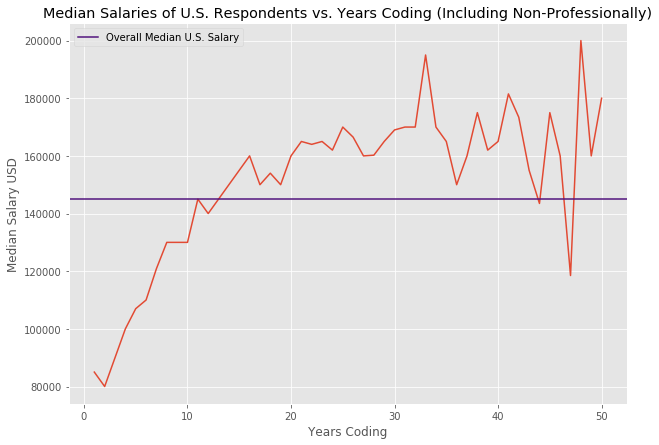

In [53]:
#US median salary by yearscode
usDF.sort_values(by='YearsCode')
usYearsCodeGroups = usDF.groupby(['YearsCode'])
medianByYearsCode = dict(usYearsCodeGroups['ConvertedCompYearly'].median())
yearsCode = list(medianByYearsCode.keys())
ycMedians = list(medianByYearsCode.values())
plt.plot(yearsCode, ycMedians)
plt.title('Median Salaries of U.S. Respondents vs. Years Coding (Including Non-Professionally)')
plt.xlabel('Years Coding')
plt.ylabel('Median Salary USD')
plt.axhline(usOverallMedianSal, color='#51127c', label='Overall Median U.S. Salary')
plt.legend()

In [54]:
usDF.corr()

,YearsCode,YearsCodePro,CompTotal,ConvertedCompYearly,MentalHealthCount
YearsCode,1.000000,0.916773,0.131094,0.006392,-0.059396
YearsCodePro,0.916773,1.000000,0.108736,-0.000434,-0.078747
CompTotal,0.131094,0.108736,1.000000,0.166075,-0.047598
ConvertedCompYearly,0.006392,-0.000434,0.166075,1.000000,-0.003078
MentalHealthCount,-0.059396,-0.078747,-0.047598,-0.003078,1.000000


Looking at the two previous line graphs, there did not appear to be a correlation between median salary and either years coding or years of professional coding. Furthermore, pulling up the pearson correlation coefficients for variables within the usDF DataFrame shows that no significant correlations were found between those variables. The only variable that did show a strong relationship were years coding and years coding professionally which makes sense. 

([<matplotlib.axis.YTick at 0x7fe6fcf25750>,
 <a list of 3 Text yticklabel objects>)

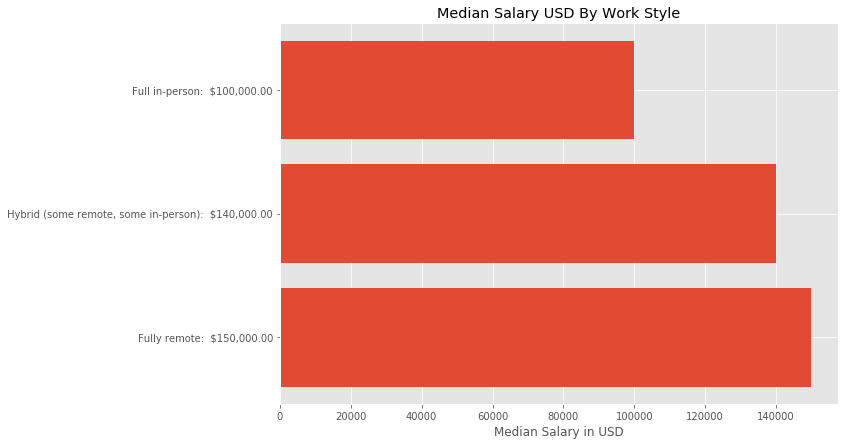

In [55]:
#work style vs median salary
remoteMedSal = usDF.loc[usDF['RemoteWork'] == 'Fully remote', 'ConvertedCompYearly'].median()
hybridMedSal = usDF.loc[usDF['RemoteWork'] == 'Hybrid (some remote, some in-person)', 'ConvertedCompYearly'].median()
inPersonMedSal = usDF.loc[usDF['RemoteWork'] == 'Full in-person', 'ConvertedCompYearly'].median()

workStyleMedians = [remoteMedSal, hybridMedSal, inPersonMedSal]
workStyleGroups = ['Fully remote', 'Hybrid (some remote, some in-person)', 'Full in-person']
plt.barh(workStyleGroups, workStyleMedians)
plt.title('Median Salary USD By Work Style')
plt.xlabel('Median Salary in USD')

workStyleLabels = [i+':  ${:0,.2f}'.format(j) for i, j in zip(workStyleGroups, workStyleMedians)]
plt.yticks(range(len(workStyleGroups)), workStyleLabels)

It is very interesting to see that U.S. workers with fully in-person positions had a significantly lower median salary than those who had either fully remote or hybrid works styles. It seems like there could be some other factors at play here, like fully in-person roles being more common among new hires or less experienced workers. Of course this is just speculation but it does prompt further investigation.

Text(0.5, 1.0, 'Years of Professional Coding by Work Style')

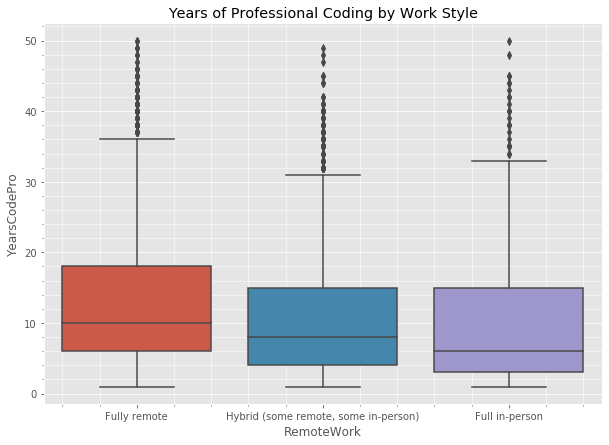

In [56]:
#yearscodepro by work style
workStyleYearsCodePro = usDF[['RemoteWork', 'YearsCodePro']].copy()
workStyleYearsCodePro['RemoteWork'].astype("category")
sb.boxplot(x=workStyleYearsCodePro['RemoteWork'], y=workStyleYearsCodePro['YearsCodePro'])
plt.minorticks_on()
plt.grid(which='minor', linewidth='0.5', color='white')
plt.title('Years of Professional Coding by Work Style')

After plotting the years of professional coding for each of the work style groups, it seems that the median value for years of professional coding is lowest among the fully in-person work group. The fully remote group has the highest median value for years of professional coding with 10 years, and each succesive group (moving right) had one less year. This is interesting but the interquartile ranges for each of these groups is relatively close and does not necesarily explain the salary differences between these groups depicted in the previous plot.

## Conclusion

The purpose of this project was to explore data gathered through the Stack Overflow 2022 Developer Survey. The different survey questions had varying response formats, which resulted in uniquely formatted data with varying data types. This meant that familiarity was needed with the particular responses and the desired outcome when processing that data for use. During this process of cleaning and preparing the data, the composition of the data was also revealed. One things that stood out was the gender composition of survey respondents. The data showed that women represented only about 5% of the sample. In an industry with an already noteworthy gender gap, the female representation within this sample underperformed broader industry estimates by a long shot. This raises a lot of questions, including regarding potential sampling bias.
After preparing the data for analysis, potential relationships were explored among the variables. While no strong relationships were found within the data, it did bring up some questions for further research and analysis. One relationship that would be interesting to explore further is the effect of mental health in the workplace and in career outcomes. The data showed that there was some form of inverse association between number of mental health conditions and median salary among the sample, but it would be interesting to explore this further and incorporate other potentially related variables. It would also be useful to continue exploring work style in relation to other variables. For example, determining which work style (remote ,hybrid, or in-person) is best suited for different groups of people, differentiated by personality, mental health, and job activities.